In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [3]:
import numpy as np
def vectorize_sequences(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results


In [4]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
#ahora aplicaremos el procesamiento de datos para los datos de salida
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [5]:
#ahora comenzaremos a preparar la estrutie para nuestra red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [6]:
def generate_model():
    """
        para este modelo de deep learning recomendamos usar capas de 64 neuronas cada una
    """
    model=Sequential()
    model.add(Dense(64,activation='relu',input_shape=(10000,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(46,activation='softmax'))
    #ahora agregamos la configuracion de compilacion
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model

In [7]:
model=generate_model()


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


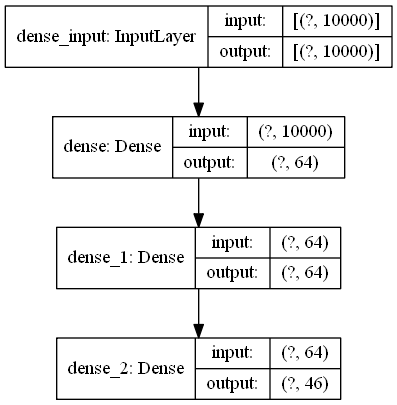

In [10]:
plot_model(model,show_shapes=True)

In [11]:
#separamos los datos en entrenamiento y validacion
x_val=x_train[:1000]
y_val=y_train[:1000]

x_train=x_train[1000:]
y_train=y_train[1000:]

In [12]:
#entrenamos el modelo por primera vez
history=model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 60ms/step - loss: 2.5869 - accuracy: 0.5110 - val_loss: 1.6951 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.3955 - accuracy: 0.7078 - val_loss: 1.2669 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0334 - accuracy: 0.7774 - val_loss: 1.1058 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8141 - accuracy: 0.8277 - val_loss: 1.0295 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6528 - accuracy: 0.8643 - val_loss: 0.9686 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5233 - accuracy: 0.8924 - val_loss: 0.9216 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4285 - accuracy: 0.9105 - val_loss: 0.8957 - val_accuracy: 0.8160
Epoch 8/20
16

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
#ahora veamos el rendimiento del modelo
train_loss=history.history['loss']
validation_loss=history.history['val_loss']
#para la funcion de puntaje en este caso accuracy
train_acc=history.history['accuracy']
validation_acc=history.history['val_accuracy']

epochs=range(1,len(history.history['accuracy'])+1)
#funcion de perdida
def plot_perdida(train_loss,validation_loss,epochs):
    plt.plot(epochs,train_loss,'go-',label='train loss')
    plt.plot(epochs,validation_loss,'ro-',label='validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss function')
    plt.legend(loc='best')
    plt.show()

In [23]:
def plot_accuracy(train_acc,validation_acc,epochs):
    plt.plot(epochs,train_acc,'go-',label='train accuracy')
    plt.plot(epochs,validation_acc,'ro-',label='validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.show()

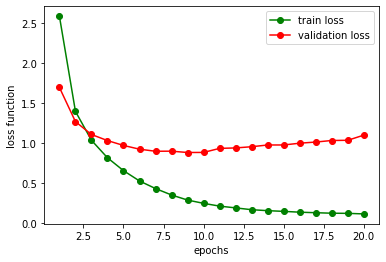

In [24]:
#mostramos las graficas
plot_perdida(train_loss,validation_loss,epochs)

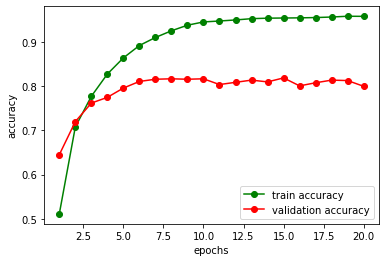

In [26]:
plot_accuracy(train_acc,validation_acc,epochs)

In [30]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2203 - accuracy: 0.7876


[1.2202740907669067, 0.7876224517822266]

In [40]:
#obtuvimos un puntaje de 78.76%, ahora trataremos
# de ejecutar el modelo con menos epochs o iteraciones sobre los dtos de entrenamiento, en este caso 10
model=generate_model()

In [41]:
history=model.fit(x_train,y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.6959 - accuracy: 0.4959 - val_loss: 1.7322 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.3943 - accuracy: 0.7131 - val_loss: 1.2819 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0178 - accuracy: 0.7806 - val_loss: 1.1055 - val_accuracy: 0.7570
Epoch 4/9
16/16 [==============================] - 1s 39ms/step - loss: 0.7969 - accuracy: 0.8287 - val_loss: 1.0151 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6308 - accuracy: 0.8642 - val_loss: 0.9565 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5048 - accuracy: 0.8931 - val_loss: 0.9262 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4076 - accuracy: 0.9173 - val_loss: 0.9111 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [42]:
train_loss=history.history['loss']
validation_loss=history.history['val_loss']
#para la funcion de puntaje en este caso accuracy
train_acc=history.history['accuracy']
validation_acc=history.history['val_accuracy']

epochs=range(1,len(history.history['accuracy'])+1)

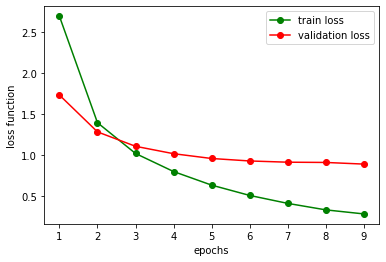

In [43]:
plot_perdida(train_loss,validation_loss,epochs)

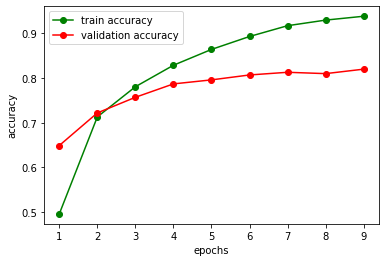

In [44]:
plot_accuracy(train_acc,validation_acc,epochs)

In [45]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9800 - accuracy: 0.7907


[0.9799906015396118, 0.790739119052887]

In [47]:
y_pred=model.predict(x_test)

In [50]:
y_pred=np.argmax(y_pred,axis=1)

In [52]:
y_test1=np.argmax(y_test,axis=1)

In [54]:
#ahora elaboraremos un reporte de clasificacion con librerias de machine lasrning de python
from sklearn.metrics import classification_report

In [55]:
result=classification_report(y_test1,y_pred)

C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(result)

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.68      0.79      0.73       105
           2       0.67      0.70      0.68        20
           3       0.90      0.94      0.92       813
           4       0.83      0.87      0.85       474
           5       0.00      0.00      0.00         5
           6       0.76      0.93      0.84        14
           7       0.50      0.33      0.40         3
           8       0.62      0.68      0.65        38
           9       0.82      0.72      0.77        25
          10       0.96      0.80      0.87        30
          11       0.56      0.78      0.65        83
          12       0.40      0.15      0.22        13
          13       0.56      0.51      0.54        37
          14       0.33      0.50      0.40         2
          15       0.50      0.11      0.18         9
          16       0.65      0.79      0.71        99
          17       1.00    

In [62]:
#ahora probaremos una matriz de confusion para estos dastos de clasificacion multietiqueta
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

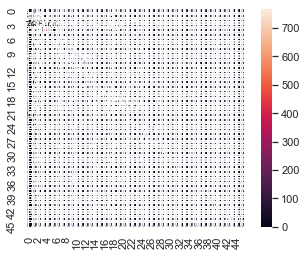

In [68]:
import seaborn as sns; sns.set()
mat=confusion_matrix(y_test1,y_pred)
sns.heatmap(mat,annot=True,fmt='.2f',square=True)